# Default Risk for Approved Loans

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, roc_auc_score, confusion_matrix, matthews_corrcoef

from sklearn.ensemble import RandomForestClassifier

- loan amnt: The amount of loan requested.

- term: The term length of the loan in months.

- installment: Monthly installment amount.

- emp_length: Employment length.

- dti: Debt-to-Income ratio, a measure used to evaluate the borrower's ability to manage debt.

- open_acc: The number of open credit lines.

- revol_util: Credit utilization rate, which is the amount of credit the borrower is using relative to all available revolving credit.

- total_acc: The total number of credit lines the borrower has.

- mort_acc: Number of mortgages

- log_annual_inc: Logarithm of the borrower's annual income.

- fico_score: FICO credit score of the borrower.

- log_revol_bal: Logarithm of the revolving balance, likely related to credit card balance.

In [7]:
X_path = '/Users/sabrina.aufiero/Desktop/COMP0050 Machine Learning with Applications in Finance/Week 5/data_Lecture3/X.csv'

# Load the data without a header, then add column names manually
X = pd.read_csv(X_path, header=None)

# Define the column names
column_names = ["loan_amnt", "term", "installment", "emp_length", "dti", "open_acc", 
                "revol_util", "total_acc", "mort_acc", "log_annual_inc", 
                "fico_score", "log_revol_bal"]

# Add the column names to the DataFrame
# If the DataFrame already contains a row of data and you're adding column names,
# make sure to skip the first data row from the current DataFrame, then set the column names.
if X.shape[1] == len(column_names):  # Check if the number of columns matches
    X.columns = column_names
    X_v1 = X
else:
    print("The number of column names provided does not match the number of columns in the DataFrame.")

# Now X_v1 contains the data with the correct column names set
display(X_v1)

,loan_amnt,term,installment,emp_length,dti,open_acc,revol_util,total_acc,mort_acc,log_annual_inc,fico_score,log_revol_bal
0,10000,36,344.95,10,23.55,1,49.2,14,3,4.9590,697,3.5371
1,32500,36,1105.60,10,7.88,7,39.9,24,12,5.0792,777,4.3377
2,15000,36,481.69,6,19.45,10,33.6,27,2,4.7634,752,4.0127
3,23075,36,928.36,1,0.44,4,0.3,21,0,4.8325,697,1.8451
4,26400,60,862.10,2,17.32,13,57.0,19,0,4.7782,697,4.0569
...,...,...,...,...,...,...,...,...,...,...,...,...
4115,20000,60,489.45,5,10.64,10,49.2,19,2,5.0000,687,3.8797
4116,8400,36,301.88,10,36.90,14,79.2,29,2,4.5441,662,4.2950
4117,24000,60,691.55,10,16.87,10,64.1,28,5,5.0212,707,4.1450
4118,16000,36,537.95,0,20.41,12,36.5,15,0,5.1139,717,3.7929


In [8]:
statistics_x = X_v1.describe().round(1)
display(statistics_x)

,loan_amnt,term,installment,emp_length,dti,open_acc,revol_util,total_acc,mort_acc,log_annual_inc,fico_score,log_revol_bal
count,4120.0,4120.0,4120.0,4120.0,4120.0,4120.0,4120.0,4120.0,4120.0,4120.0,4120.0,4120.0
mean,16289.0,42.2,534.0,5.5,15.4,10.7,47.7,23.4,1.6,4.9,697.0,3.9
std,9546.9,10.5,313.3,3.6,8.5,5.2,24.6,11.8,2.2,0.3,32.9,0.6
min,1000.0,36.0,32.7,0.0,0.0,1.0,0.0,3.0,0.0,3.9,662.0,0.0
25%,8643.8,36.0,292.2,2.0,8.6,7.0,28.9,15.0,0.0,4.7,672.0,3.6
50%,15000.0,36.0,470.0,5.0,14.6,10.0,47.6,22.0,1.0,4.9,687.0,3.9
75%,22931.2,60.0,719.0,10.0,21.2,13.0,67.3,30.0,3.0,5.0,712.0,4.2
max,40000.0,60.0,1485.6,10.0,46.1,52.0,137.8,118.0,21.0,6.7,842.0,6.0


In [9]:
y_path = '/Users/sabrina.aufiero/Desktop/COMP0050 Machine Learning with Applications in Finance/Week 5/data_Lecture3/y.csv'

# Load the data without a header and then add the column name manually
y = pd.read_csv(y_path, header=None)

# Define the column name
y.columns = ["charged_off"]

# Now y contains the data with the correct column name set
display(y)

,charged_off
0,0
1,1
2,1
3,1
4,1
...,...
4115,1
4116,0
4117,0
4118,0


In [10]:
statistics_y = y.describe().round(1)
display(statistics_y)

,charged_off
count,4120.0
mean,0.6
std,0.5
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


The last variable "charged_off" is the output we wish to predict given the features associated with the other variables in the table.

# non-default = 0
# default = 1

# Trees

In [11]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_v1, y, test_size=0.3, random_state=42)

In [12]:
# We will store the accuracy scores in a dictionary
accuracy_scores = {}

In [13]:
# We will train decision tree classifiers with varying depths and evaluate accuracy

for depth in range(1, 26):
    # Initialize the decision tree classifier with the current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit the model to the training data
    tree_clf.fit(X_train, y_train.values.ravel())
    
    # Predict on the test data
    y_pred = tree_clf.predict(X_test)
    
    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[depth] = accuracy

In [14]:
print(accuracy_scores)

# Find the depth with the highest accuracy
optimal_depth = max(accuracy_scores, key=accuracy_scores.get)
optimal_accuracy = accuracy_scores[optimal_depth]

{1: 0.5954692556634305, 2: 0.6092233009708737, 3: 0.6084142394822006, 4: 0.6067961165048543, 5: 0.6132686084142395, 6: 0.6011326860841424, 7: 0.5833333333333334, 8: 0.5833333333333334, 9: 0.5550161812297735, 10: 0.563915857605178, 11: 0.5444983818770227, 12: 0.558252427184466, 13: 0.5453074433656958, 14: 0.5364077669902912, 15: 0.5372168284789643, 16: 0.5355987055016181, 17: 0.5477346278317152, 18: 0.529126213592233, 19: 0.540453074433657, 20: 0.5469255663430421, 21: 0.5501618122977346, 22: 0.5485436893203883, 23: 0.5533980582524272, 24: 0.5533980582524272, 25: 0.5533980582524272}


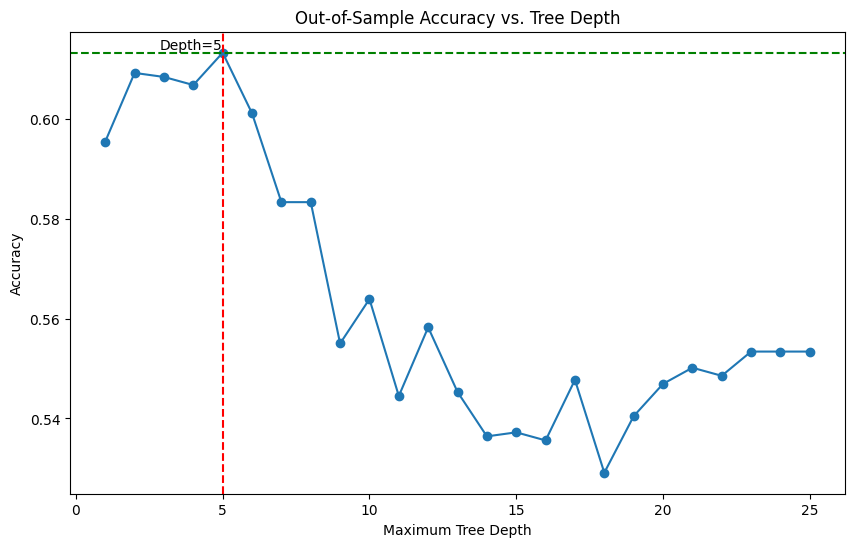

In [15]:
# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), marker='o')
plt.title('Out-of-Sample Accuracy vs. Tree Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.axvline(x=optimal_depth, color='r', linestyle='--')
plt.axhline(y=optimal_accuracy, color='g', linestyle='--')
plt.text(optimal_depth, optimal_accuracy, f"Depth={optimal_depth}", va='bottom', ha='right')
plt.show()

In [16]:
# Now, let's also calculate the confusion matrix for the optimal depth
tree_clf_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
tree_clf_optimal.fit(X_train, y_train.values.ravel())
y_pred_optimal = tree_clf_optimal.predict(X_test)

conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

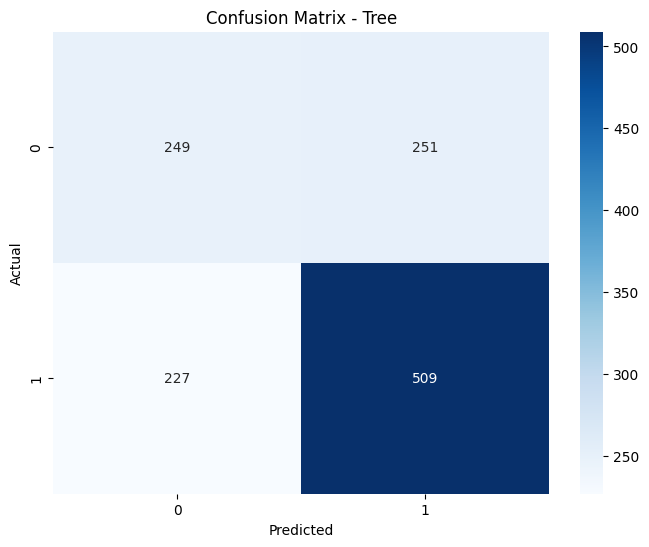

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Tree')
plt.show()

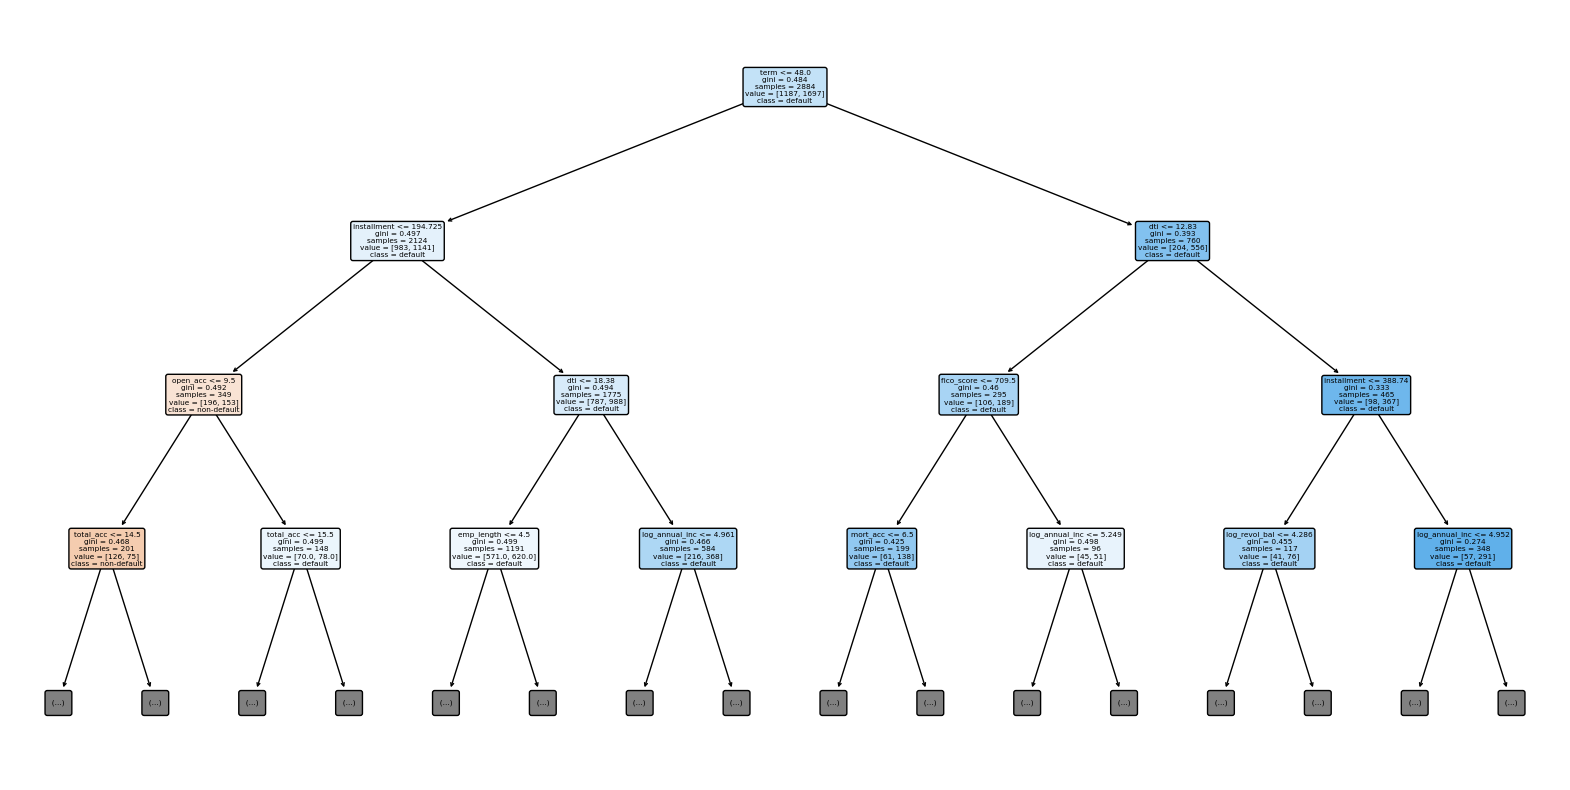

In [23]:
plt.figure(figsize=(20,10))  
plot_tree(tree_clf_optimal, 
          filled=True, 
          rounded=True, 
          class_names=["non-default", "default"],  
          feature_names=X_train.columns,  
          max_depth= 3) #optimal_depth)  
plt.savefig('decision_tree.pdf')
plt.show()

### Nodes
- Decision Nodes (Internal): These represent the points where the tree considers a particular feature to split the data. Each decision node displays the condition (e.g., feature_name <= value) that separates the data into two groups. The choice of which feature and what value to split on is based on the ability to reduce impurity in the resulting nodes.
- Leaf Nodes (Terminal): These represent the final output of the tree for observations that fulfill all conditions along the path from the root node. In a classification context, each leaf node shows the predicted class for observations that reach that node.


### Information in Nodes
- Split Condition (only in decision nodes): Shows the rule used to split the data at that point (e.g., X[n] <= value), where X[n] is the feature being tested and value is the threshold.
- gini: The Gini index, which measures the node's impurity. A value of 0 indicates that all instances in the node belong to the same class. Higher values indicate a greater mix of classes.
- samples: The number of observations in the node.
- value: An array showing the number of observations of each class that are present in the node. For example, [10, 20] indicates that there are 10 observations of the first class and 20 of the second within the node.
- class: (only in leaf nodes) The predicted class for observations in that node, based on the majority. It is determined by the index with the largest number in value.

### Interpretation
- Decision Path: Starting from the root node at the top, follow the decision path based on the input data features. Whenever a condition in a decision node is satisfied, you proceed along the 'true' branch (left); otherwise, you proceed along the 'false' branch (right).
- Tree Depth: In your case, you have limited the tree to a depth of 3, meaning there will be at most 3 levels of decision nodes between the root node and the leaf nodes. This makes the tree simpler and easier to interpret but might limit its ability to perfectly fit the training data.
- Division Choices and Classification: By examining the nodes, you can understand which features are most important for classification and how different thresholds of these features influence the final decision (default or non-default).

### term, installment and dti are the first variables along which the feature space is divided:
- The term length of the loan in months.
- Monthly installment amount.
- Debt-to-Income ratio, a measure used to evaluate the borrower's ability to manage debt.

This makes intuitive sense as these are quantities related to the risk associated with the client.

## Different metrics:

- Accuracy Score:
Accuracy measures the ratio of correctly predicted instances to the total instances in the dataset. It provides an overall assessment of how well the model is performing in terms of correctly classifying both positive and negative instances. It is not always the best metric for imbalanced datasets.

- F1 Score:
The F1 score is the harmonic mean of precision and recall. Precision measures the ability of the model to correctly identify positive instances among the instances it predicts as positive. Recall measures the ability of the model to correctly identify all actual positive instances. The F1 score balances precision and recall and is especially useful when dealing with imbalanced datasets.

- Mean Squared Error (MSE):
MSE is a regression metric and measures the average squared difference between the predicted and actual values. It quantifies how close the predicted values are to the actual values. Lower MSE values indicate better model performance for regression tasks.

- Area Under the Curve (AUC-ROC):
ROC is a curve that shows the trade-off between true positive rate and false positive rate at various thresholds. AUC measures the area under the ROC curve, which quantifies the model's ability to distinguish between positive and negative classes. AUC values range from 0 to 1, with a higher AUC indicating better discrimination between classes. An AUC of 0.5 indicates random guessing.

- The Matthews correlation coefficient (MCC) takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

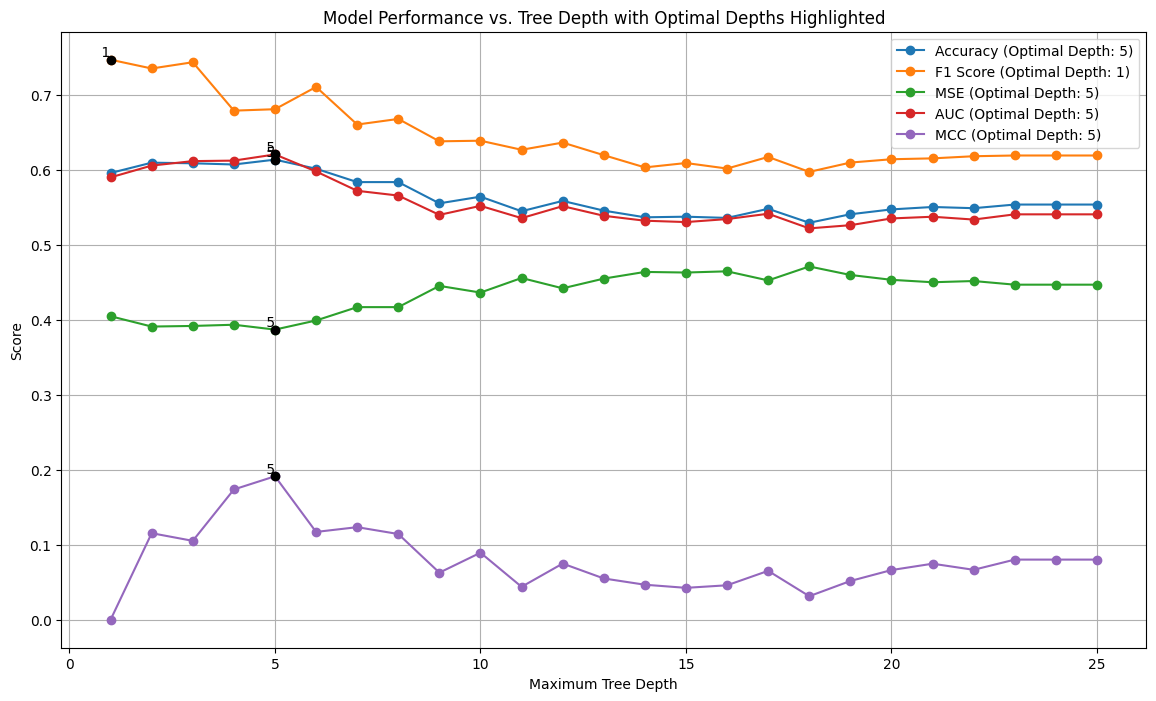

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_v1, y, test_size=0.3, random_state=42)

# Dictionaries to store the scores
metrics_scores = {
    'Accuracy': {},
    'F1 Score': {},
    'MSE': {},
    'AUC': {},
    'MCC': {}
}

for depth in range(1, 26):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train.values.ravel())
    y_pred = tree_clf.predict(X_test)
    y_pred_proba = tree_clf.predict_proba(X_test)[:, 1]  # For AUC, we need probability scores of the positive class
    
    # Calculating and storing scores
    metrics_scores['Accuracy'][depth] = accuracy_score(y_test, y_pred)
    metrics_scores['F1 Score'][depth] = f1_score(y_test, y_pred, average='binary')  # Use 'macro' for multi-class
    metrics_scores['MSE'][depth] = mean_squared_error(y_test, y_pred)
    metrics_scores['AUC'][depth] = roc_auc_score(y_test, y_pred_proba)
    metrics_scores['MCC'][depth] = matthews_corrcoef(y_test, y_pred)

plt.figure(figsize=(14, 8))

# Optimal depths storage
optimal_depths = {}

for metric, scores in metrics_scores.items():
    depths = list(scores.keys())
    values = list(scores.values())
    
    # For MSE, we seek the minimum; for others, the maximum
    if metric == 'MSE':
        optimal_index = np.argmin(values)
    else:
        optimal_index = np.argmax(values)
        
    optimal_depth = depths[optimal_index]
    optimal_value = values[optimal_index]
    optimal_depths[metric] = (optimal_depth, optimal_value)
    
    # Plot each metric
    plt.plot(depths, values, label=f'{metric} (Optimal Depth: {optimal_depth})', marker='o')
    
    # Mark the optimal depth
    plt.scatter(optimal_depth, optimal_value, color='black', zorder=5)
    plt.text(optimal_depth, optimal_value, f" {optimal_depth}", verticalalignment='bottom', horizontalalignment='right')

# Adding plot details
plt.title('Model Performance vs. Tree Depth with Optimal Depths Highlighted')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Forest

### From Tree to Forest
A single decision tree, while being highly interpretable, is prone to overfitting, especially with complex datasets. Overfitting happens when the model captures noise or random fluctuations in the training data, leading to poor generalization to new, unseen data. Moreover, decision trees can be quite sensitive to small changes in the training data, leading to different splits and a high variance in predictions.

The intuition behind forests is the following: Imagine we have different instances of the training set. For each instance, we can train a tree. The prediction of such tree would be a random variable, because it inherits the randomness of the training data. We can then improvethe performance by aggregating the prediction of the different trees because the standard deviation associated with the average of identically distributed random variable is smaller than the standard deviation of the individual variables.

### Bagging
Bagging, or Bootstrap Aggregating, is a technique used to reduce variance in predictive models by training multiple models on different subsets of the training dataset and then averaging their predictions. In the context of decision trees, bagging involves creating multiple trees on bootstrapped samples (random samples with replacement) of the data and then combining their predictions through majority voting for classification or averaging for regression. This process helps in mitigating the overfitting and high variance issues associated with single decision trees.

### Random Forest
Random Forest takes the concept of bagging further by introducing an additional layer of randomness. While it still trains multiple decision trees on bootstrapped samples of the data, it also randomly selects a subset of features at each split in the decision process, rather than considering all features. This randomness ensures that the individual trees are de-correlated, making the forest more robust and less prone to overfitting than a single tree or even basic bagging. The Random Forest algorithm combines the predictions of these diverse trees, typically leading to improved accuracy and stability over single decision trees.

We now train a random forest corresponding to the aggregation of 100 trees, and where the number of features considered at each split is 3.

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_v1, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)


# Fit the model on the training data
rf_clf.fit(X_train, y_train.values.ravel())

# Predict on the test data
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.61084142394822


The performance of the model is around 61% of accuracy, and is similar to that of the tree we have seen above.

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)

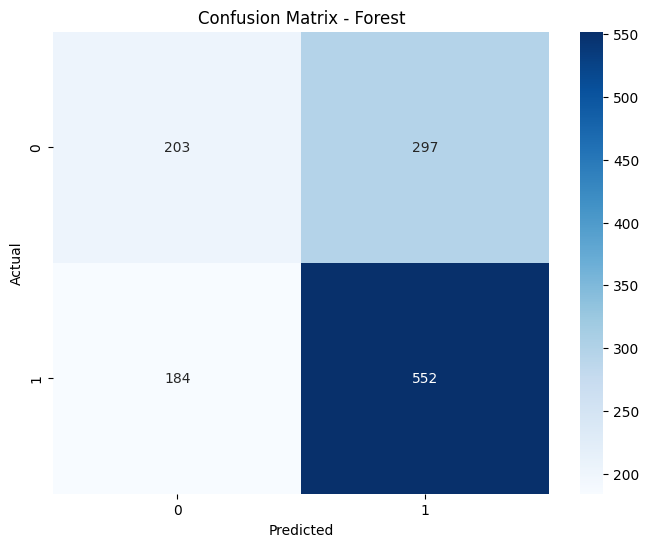

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Forest')
plt.show()

A measure of the out-of-sample error in this case is called "out-of-bag error".

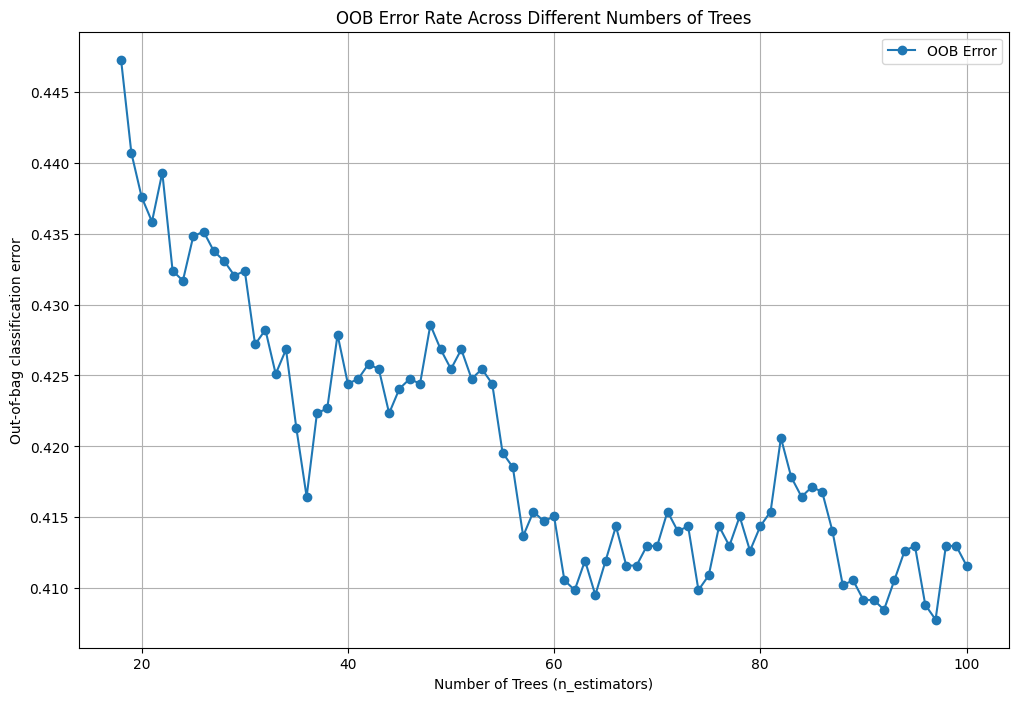

In [29]:
# List to store OOB errors
oob_errors = []

# Range of `n_estimators` to explore
n_estimators_range = range(18, 101)

for n_estimators in n_estimators_range:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, 
                                    oob_score=True, 
                                    max_features=3, 
                                    random_state=42,
                                    n_jobs=-1,
                                    warm_start=True) # Enable warm_start to add more trees incrementally
    rf_clf.fit(X_train, y_train.values.ravel())
    
    # Store OOB error
    oob_error = 1 - rf_clf.oob_score_  # OOB error = 1 - OOB accuracy
    oob_errors.append(oob_error)

# Plotting the OOB error as a function of n_estimators
plt.figure(figsize=(12, 8))
plt.plot(n_estimators_range, oob_errors, '-o', label='OOB Error')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Out-of-bag classification error')
plt.title('OOB Error Rate Across Different Numbers of Trees')
plt.legend()
plt.grid(True)
plt.show()

Behavior of the out-of-bag error as a function of number of trees: aggregating over multiple trees improves the performance.

### Variable Importance

When interpreting the plot of permutation feature importance generated from a Random Forest model, you are looking at how the shuffling of each feature across multiple iterations affects the model's performance. 

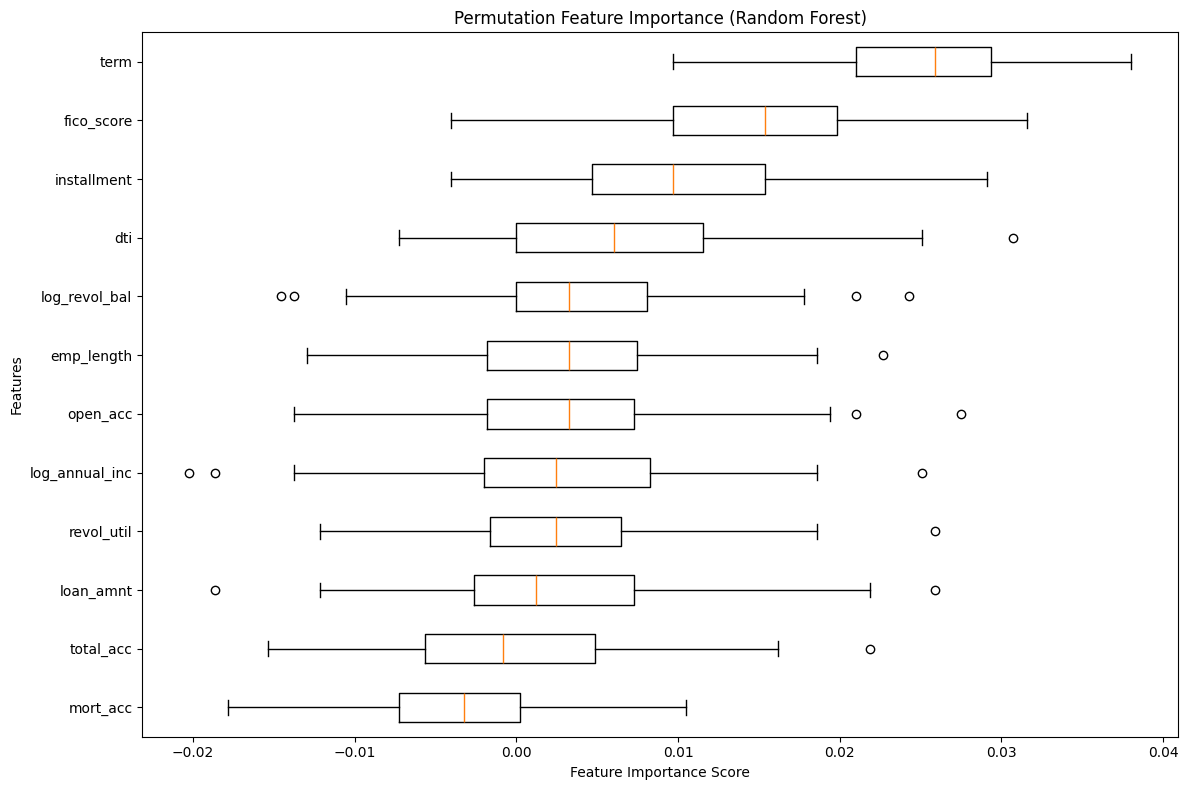

In [31]:
from sklearn.inspection import permutation_importance

# Compute the permutation feature importance
result = permutation_importance(rf_clf, X_test, y_test, n_repeats=100, random_state=42, n_jobs=-1)

# Sort the features by importance
sorted_idx = result.importances_mean.argsort()

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Feature Importance (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Feature Importance Score represents the change in model performance due to the shuffling of the feature values. A higher score indicates that the feature is more important for the model's predictions because its permutation (shuffling) leads to a larger drop in performance.

- High Importance Features: Features towards the top of the plot with wider boxes or higher median lines are considered more important. These features, when shuffled, have a more significant impact on model performance, indicating they have strong predictive power.
- Low Importance or Noisy Features: Features at the bottom with boxes close to zero or very narrow indicate that shuffling these features doesn't significantly impact the model's performance. These might be less important, redundant, or noisy features that do not contribute much to predictions.
- Variability of Importance: The spread of the boxplot (the size of the box) can indicate how consistent the feature's importance is across different permutations. A narrow box suggests consistent importance, while a wide box indicates variability in how much shuffling the feature affects model performance.

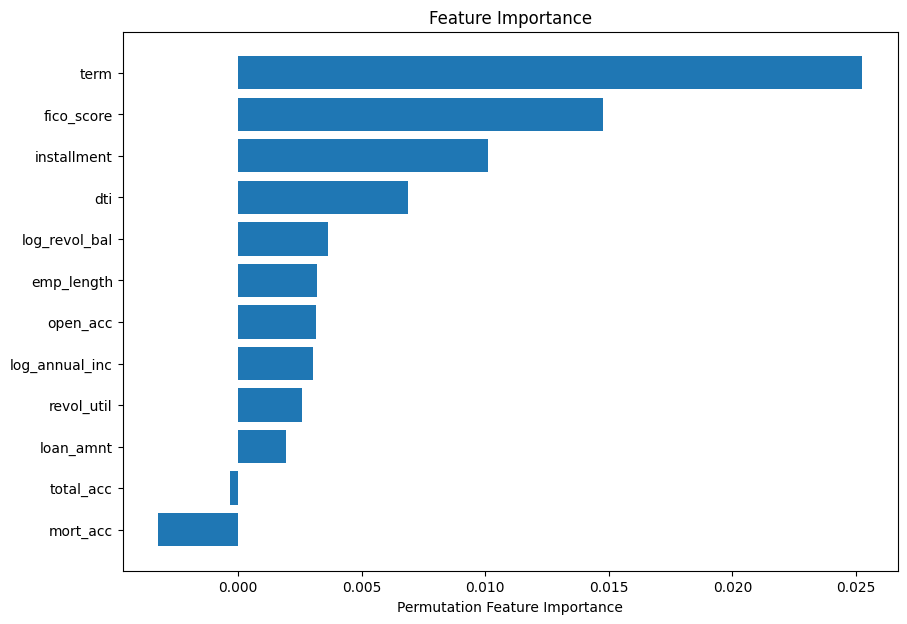

In [32]:
importances = result.importances_mean
plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Permutation Feature Importance")
plt.title("Feature Importance")
plt.show()

We see that the most important variables appear to be the term length of the loan in months, the fico-score (meant to capture the capability of a debtor to fulll their obligations), and the monthly installment amount. 

As before, this makes intuitive sense as these are quantities related to the risk associated with the client.

From the feature importance analysis, it emerges that the feature "term" is significantly more important than the others. Indeed, the analysis of the optimal depth reveals that the F1 score reaches the maximum already at a depth of 1. This confirms that the term feature alone is highly predictive of the outcome.